In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_train.shape, df_test.shape

((891, 12), (418, 11))

In [4]:
#the most important thing to do in imputation
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
df_test['Fare']=df_test['Fare'].fillna(df_train['Fare'].median())

<Axes: xlabel='Embarked', ylabel='count'>

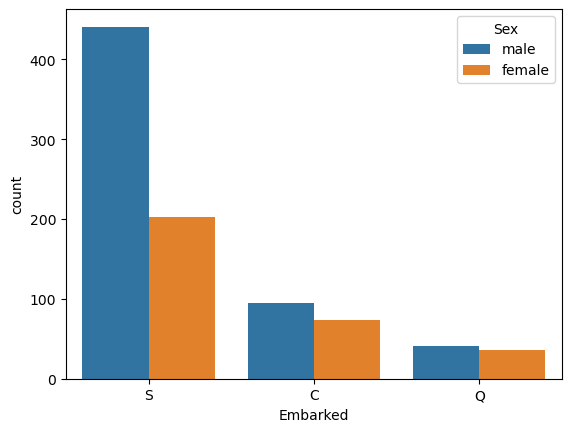

In [7]:
#we have one column missing 2 data missing in the Embarked training columns, lets impute it
sns.countplot(x=df_train['Embarked'], hue=df_train['Sex'])

In [8]:
df_train[df_train['Embarked'].isnull()]
#lets get all the passenger in the df_train such that their embarked is null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


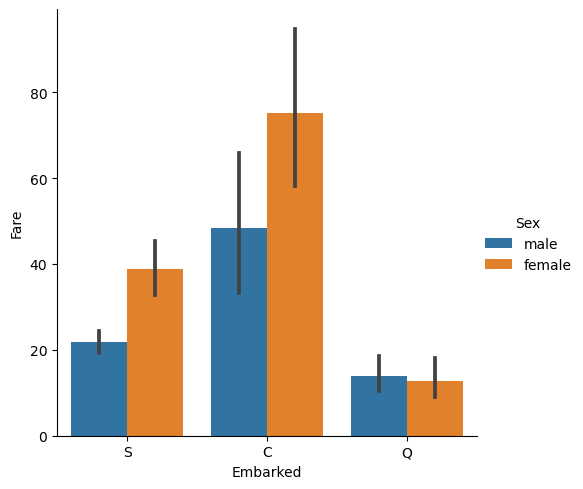

In [9]:
sns.catplot(x='Embarked', y='Fare', kind='bar', hue='Sex', data=df_train)
#this shows that the female having a high fare actually used the C Embarked

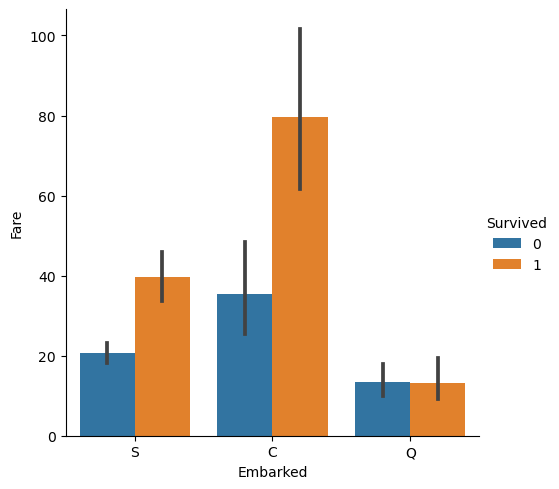

In [10]:
sns.catplot(x='Embarked', y='Fare', kind='bar', hue='Survived', data=df_train)

In [11]:
df_train['Embarked']=df_train['Embarked'].fillna('C')
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

C:\Users\acer\AppData\Local\Temp\ipykernel_6180\2807771676.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[df_train['Survived']==0]['Age'], hist=False, color='Red')
C:\Users\acer\AppData\Local\Temp\ipykernel_6180\2807771676.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

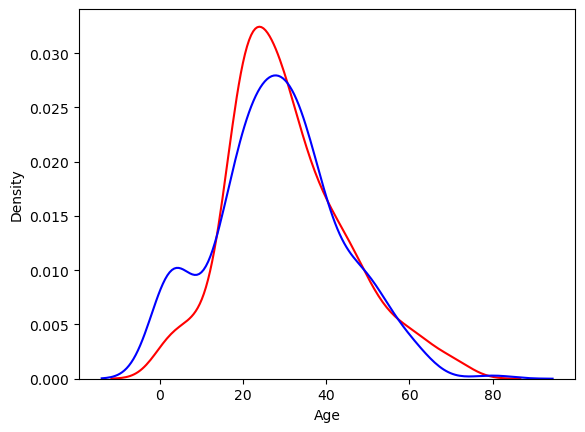

In [12]:
sns.distplot(df_train[df_train['Survived']==0]['Age'], hist=False, color='Red')
sns.distplot(df_train[df_train['Survived']==1]['Age'], hist=False, color='Blue')
plt.show()
#looking at the age, we

In [13]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

C:\Users\acer\AppData\Local\Temp\ipykernel_6180\4243253022.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(t[t['Survived']==0]['Age'], hist=False, color='Red',ax=axes[index])
C:\Users\acer\AppData\Local\Temp\ipykernel_6180\4243253022.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

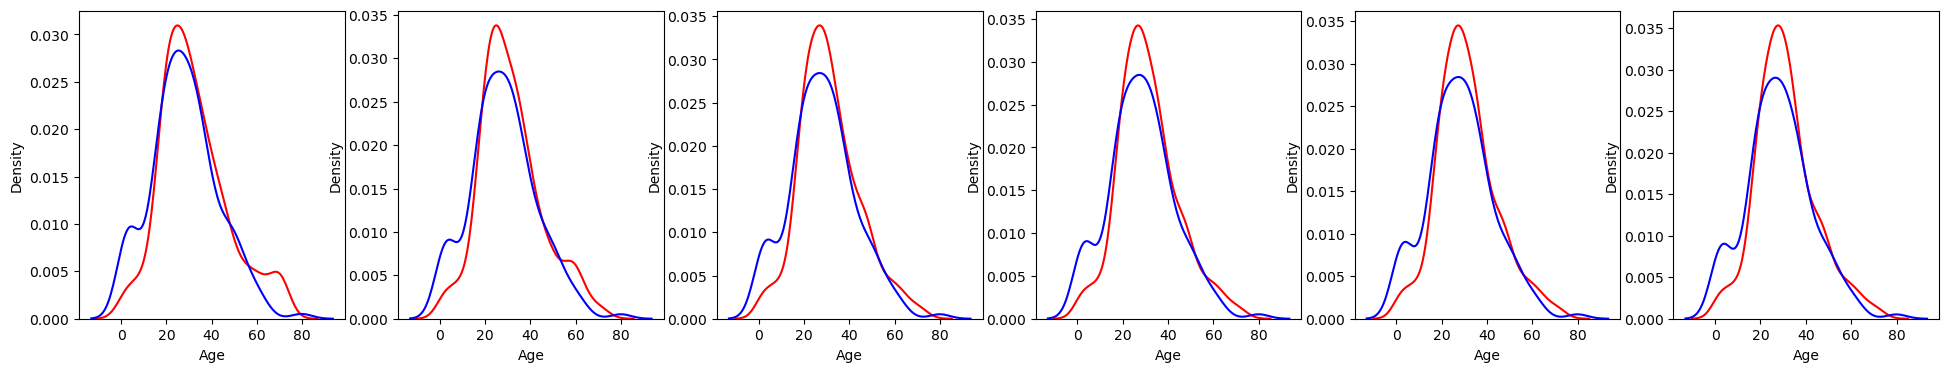

In [14]:
#from the above distribution graph we can conclude that the people with age 0-18 has a higher rate of survival, people between age 18-35 have a lower rate of survival,
#people with age 36-60 have a ambiguous rate of survival whereas the people with 60 or more age has a higher rate of survival
#we can't use the random imputed for imputin the age beacuse the distribution of age might not change if compared alone but with have a correlational impact with othet feature
#so instead we can devide the dataset
#but before that we must make sure that we impute the dataset
fig, axes=plt.subplots(ncols=6, figsize=(24,4))
from sklearn.impute import KNNImputer
for i in range(1,12,2):
    knn=KNNImputer(n_neighbors=i,weights='distance')
    t=df_train.copy()
    t.drop(columns=['PassengerId','Name','Ticket','Cabin'], inplace=True)
    t['Sex'] = t['Sex'].map({'male': 1, 'female': 0})
    t['Embarked']=t['Embarked'].map({'C':0, 'S':1, 'Q':2})
    t=pd.DataFrame(knn.fit_transform(t), columns=t.columns)
    index=int((i-1)/2)
    sns.distplot(t[t['Survived']==0]['Age'], hist=False, color='Red',ax=axes[index])
    sns.distplot(t[t['Survived']==1]['Age'], hist=False, color='Blue', ax=axes[index])
    
plt.show()
#we can see that using the knn imputer and tuning the value to 9 gives us somewhat of the same assumption we made from the previsous observation

In [15]:
#lets drop cabin and ticket as well as passengerID as it exihibit ho correaltion with the survived
df_train.drop(columns=['Cabin', 'Ticket','PassengerId','Name'], inplace=True)
df_test.drop(columns=['Cabin', 'Ticket','PassengerId', 'Name'], inplace=True)

In [16]:
def func(x):
    if x['Parch']+x['SibSp']==0:
        return 1
    else:
        return 0

In [17]:
#lets make a alone columns, whether the guy(supposed to be gender neutral) was travelling alone or with their family
df_train['Alone']=df_train.apply(func, axis=1)
df_test['Alone']=df_test.apply(func, axis=1)

In [18]:
#hence we have got the record of the alone data, we can just rip off the data such as parch or sibsp
df_train.drop(columns=['Parch','SibSp'], inplace=True)
df_test.drop(columns=['Parch','SibSp'], inplace=True)

In [19]:
#lets replace the embarked and age using the ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[['male','female'],['C','S','Q']])
df_train[['Sex','Embarked']]=oe.fit_transform(df_train[['Sex','Embarked']])
df_test[['Sex','Embarked']]=oe.transform(df_test[['Sex','Embarked']])

In [20]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,0,3,0.0,22.0,7.2500,1.0,0
1,1,1,1.0,38.0,71.2833,0.0,0
2,1,3,1.0,26.0,7.9250,1.0,1
3,1,1,1.0,35.0,53.1000,1.0,0
4,0,3,0.0,35.0,8.0500,1.0,1


In [21]:
#lets impute the age column
knn=KNNImputer(n_neighbors=9,weights='distance')
df_train.iloc[:,1:]=pd.DataFrame(knn.fit_transform(df_train.iloc[:,1:]),columns=df_train.iloc[:,1:].columns)
df_test=pd.DataFrame(knn.transform(df_test),columns=df_test.columns)

C:\Users\acer\AppData\Local\Temp\ipykernel_6180\209561967.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_train.iloc[:,1:]=pd.DataFrame(knn.fit_transform(df_train.iloc[:,1:]),columns=df_train.iloc[:,1:].columns)


C:\Users\acer\AppData\Local\Temp\ipykernel_6180\171655192.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[df_train['Survived']==1]['Age'], hist=False)
C:\Users\acer\AppData\Local\Temp\ipykernel_6180\171655192.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_t

<Axes: xlabel='Age', ylabel='Density'>

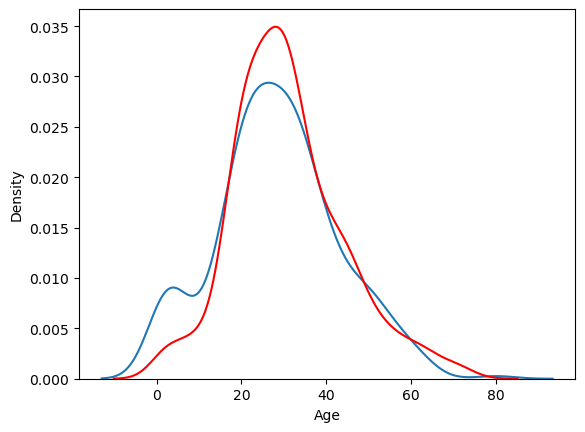

In [22]:
sns.distplot(df_train[df_train['Survived']==1]['Age'], hist=False)
sns.distplot(df_train[df_train['Survived']==0]['Age'], hist=False, color='red')

In [23]:
from sklearn.preprocessing import KBinsDiscretizer
kb=KBinsDiscretizer(n_bins=4, strategy='uniform', encode='ordinal')
df_train['Age']=kb.fit_transform(df_train['Age'].values.reshape(-1, 1))
df_test['Age']=kb.transform(df_test['Age'].values.reshape(-1, 1))

In [24]:
df_train.corr()['Survived']

Survived    1.000000
Pclass     -0.338481
Sex         0.543351
Age        -0.082694
Fare        0.257307
Embarked   -0.131042
Alone      -0.203367
Name: Survived, dtype: float64

In [25]:
X_train=df_train.iloc[:, 1:]
y_train=df_train.iloc[:,0]
X_test=df_test

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
clf=DecisionTreeClassifier()
param_dist={
    'splitter':['random','best'],
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5,6,7,None],
    'max_features':[2,3,4,5,6]
}
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(clf, param_dist, cv=5)

In [27]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                         'max_features': [2, 3, 4, 5, 6],
                         'splitter': ['random', 'best']})

In [28]:
grid.best_params_, grid.best_score_

({'criterion': 'entropy',
  'max_depth': 7,
  'max_features': 5,
  'splitter': 'best'},
 0.8103508882053857)

In [29]:
clf=DecisionTreeClassifier(criterion='gini', max_depth=3, max_features=6, splitter='best')
clf.fit(X_train, y_train)
y_test=clf.predict(X_test)
#now all i have to do is submit the dataset

In [31]:
final_submission=pd.read_csv("test.csv")[['PassengerId','Sex']]
final_submission

,PassengerId,Sex
0,892,male
1,893,female
2,894,male
3,895,male
4,896,female
...,...,...
413,1305,male
414,1306,female
415,1307,male
416,1308,male


In [32]:
final_submission['Sex']=y_test

In [33]:
final_submission.columns=['PassengerId', 'Survived']

In [34]:
final_submission[0:5]

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [35]:
final_submission.to_csv('titanic.csv', index=False)